<h1>Jesse Weiss</h1>
<h2>HW3</h2>
<h2>1/27/2018</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decisiontrees import Node
from collections import OrderedDict

In [2]:
p_slide = .01
p_nslide = 1 - p_slide

In [3]:
def gen_prob_table(p_slide, p_nslide):
    
    prob_table = {'': ['test_positive', 'test_negative', 'p_slide'],
                  'slide_yes': [.9 * p_slide, .1 * p_slide, p_slide], 
                  'slide_no': [.15 * p_nslide, .85 * p_nslide, p_nslide],
                  'p_test': [.9 * p_slide + .15 * p_nslide, 
                             .1 * p_slide + .85 * p_nslide, p_slide + p_nslide]}

    return(pd.DataFrame(OrderedDict(prob_table)).set_index(''))

In [4]:
prob_table = gen_prob_table(p_slide, p_nslide)
prob_table

,slide_yes,slide_no,p_test
,,,
test_positive,0.009,0.1485,0.1575
test_negative,0.001,0.8415,0.8425
p_slide,0.010,0.9900,1.0000


In [5]:
def gen_dtree(prob_table):
    
    p_yes_pos = prob_table.iloc[0,0] / prob_table.iloc[0,2]
    p_no_pos = prob_table.iloc[0,1] / prob_table.iloc[0,2]
    p_yes_neg = prob_table.iloc[1,0] / prob_table.iloc[1,2]
    p_no_neg = prob_table.iloc[1,1] / prob_table.iloc[1,2]
    
    # test first, negative outcome, no wall
    o2_2_2 = Node('no slide', value = 0)
    o2_2_1 = Node('slide', value = -1000000)
    e2_2 = Node('no wall', [o2_2_1, o2_2_2], [p_yes_neg,p_no_neg])

    # test first, negative outcome, build wall
    o2_1_3 = Node('wall holds', value = -40000)
    o2_1_2 = Node('wall breaks', value = -1040000)
    e2_1_1 = Node('slide', [o2_1_2, o2_1_3], [.05,.95])
    o2_1_1 = Node('no slide', value = -40000)
    e2_1 = Node('build wall', [o2_1_1, e2_1_1], [p_no_neg,p_yes_neg])
    d2 = Node('negative', [e2_1, e2_2])

    # test first, positive outcome, no wall
    o1_2_2 = Node('no slide', value = 0)
    o1_2_1 = Node('slide', value = -1000000)
    e1_2 = Node('no wall', [o1_2_1, o1_2_2], [p_yes_pos,p_no_pos])

    # test first, positive outcome, build wall
    o1_1_3 = Node('wall holds', value = -40000)
    o1_1_2 = Node('wall breaks', value = -1040000)
    e1_1_1 = Node('slide', [o1_1_2, o1_1_3], [.05,.95])
    o1_1_1 = Node('no slide', value = -40000)
    e1_1 = Node('build wall', [o1_1_1, e1_1_1], [p_no_pos,p_yes_pos])
    d1 = Node('positive', [e1_1, e1_2])

    # test first
    e0_3 = Node('test', [d1, d2], [prob_table.iloc[0,2],prob_table.iloc[1,2]])

    # no wall, no test
    o0_2_2 = Node('no slide', value = 0)
    o0_2_1 = Node('slide', value = -1000000)
    e0_2 = Node('no', [o0_2_1, o0_2_2], [1/100,99/100])

    # build wall, no test
    o0_1_3 = Node('wall holds', value = -40000)
    o0_1_2 = Node('wall breaks', value = -1040000)
    e0_1_1 = Node('slide', [o0_1_2, o0_1_3], [.05,.95])
    o0_1_1 = Node('no slide', value = -40000)
    e0_1 = Node('yes', [o0_1_1, e0_1_1], [99/100,1/100])

    d0_1 = Node('build wall?', [e0_1, e0_2])
    d0 = Node('Run Test?', [d0_1, e0_3])
    
    test_value = e0_3.evaluate() - d0_1.evaluate()
    
    return([d0.graph(), test_value])

In [6]:
dtree_graph, test_value = gen_dtree(prob_table)

In [7]:
test_value

2250.0

The mayor should pay no more than <b>$2,250</b> to conduct the test.

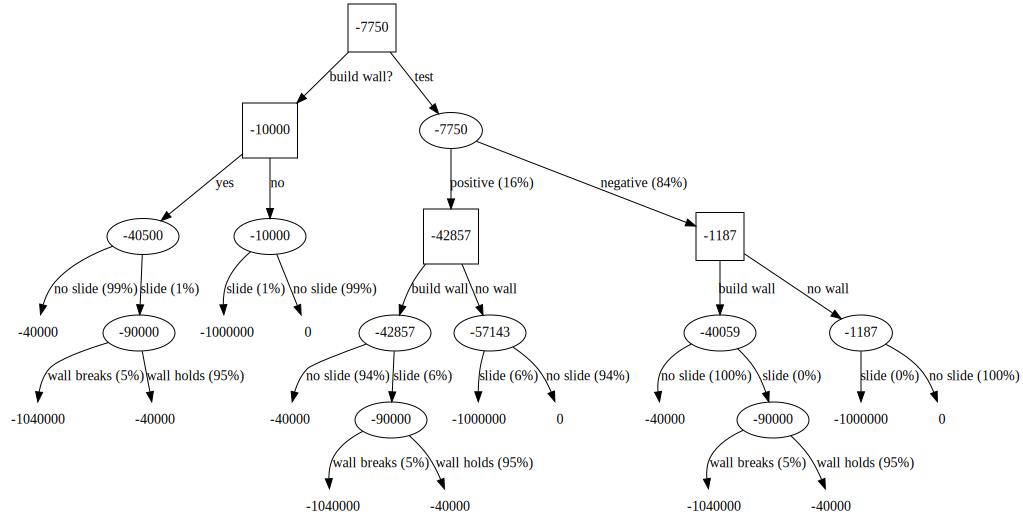

In [8]:
dtree_graph

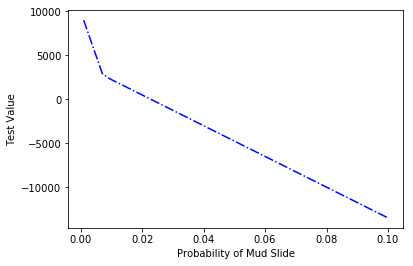

In [9]:
x = np.linspace(.001,.1,50)
y = []

for i in x:
    prob_table = gen_prob_table(i, 1 - i)
    test_value = gen_dtree(prob_table)[1]
    y.append(test_value)
    
plot = plt.plot(x,y,'b-.')
plt.xlabel('Probability of Mud Slide')
plt.ylabel('Test Value')
plt.show()